In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Generate random data points.

random.seed(501)
datapoints = [[random.randint(-50, 50) for i in range(3)] for j in range(100)]

In [3]:
# Rreturns a number which is the Euclidean distance between the two points

def pointDistance(point1, point2):
    distance = 0
    for ele in range(len(point1)):
        distance += (point2[ele] - point1[ele]) ** 2
    return pow(distance,0.5)

def clusterDistance(node1, node2):
    distances=[]
    for i in node1.cluster:
        for j in node2.cluster:
            distances.append(pointDistance(i,j))
    return distances

In [4]:
class Node:
    def __init__(self, x):
        if isinstance(x[0], list):
            self.cluster = [i for i in x]
        else:
            self.cluster = [x]
        self.height = 0
        self.leftchild = None
        self.rightchild = None

In [5]:
# Functions for linkages.

def singleLinkage(node1, node2):
    distances= clusterDistance(node1, node2)
    return(min(distances))

def completeLinkage(node1, node2):
    distances= clusterDistance(node1, node2)
    return(max(distances))

def averageLinkage(node1, node2):
    distances= clusterDistance(node1, node2)
    return(sum(distances)/len(distances))
    
def centroidLinkage(node1, node2):
    centroid1 = list(map(lambda x: sum(x)/len(x), zip(*(node1.cluster))))
    centroid2 = list(map(lambda x: sum(x)/len(x), zip(*(node2.cluster))))
    return(pointDistance(centroid1, centroid2))

In [6]:
# Returns a tuple (i,j,h) which indicates that the i-th and j-th nodes should be merged next to form a new Node with height h

def clustersToMerge(currentClusters, linkage):
    merge = [0, 0, float('inf')]
    for i in range(len(currentClusters)):
        for j in range(len(currentClusters)):
            if i!=j and j>i:
                cluster1 = currentClusters[i]
                cluster2 = currentClusters[j]
                distance = linkage(cluster1, cluster2)
                if distance < merge[2]:
                    merge[0] = i
                    merge[1] = j
                    merge[2] = distance
    return(tuple(merge))

In [7]:
def updateNode(height, leftchild, rightchild):
    newNode = Node(leftchild.cluster + rightchild.cluster)
    newNode.height = height
    newNode.leftchild = leftchild
    newNode.rightchild = rightchild
    return newNode

In [8]:
def ahc(datapoints, linkage):
    currentClusters = [Node(x) for x in datapoints]
    while len(currentClusters)>1:
        (i, j, h) = clustersToMerge(currentClusters, linkage)
        newNode = updateNode(h, currentClusters[i],currentClusters[j])
        newClusters = [currentClusters[idx] for idx in range(len(currentClusters))  if idx!=i and idx!=j]
        newClusters.append(newNode)
        currentClusters = newClusters.copy()
    return newNode

In [9]:
def cutTree(rootNode, k):
    count = 2
    kNodes = []
    currentNode = rootNode
    kNodes.append(currentNode.leftchild)
    kNodes.append(currentNode.rightchild)
    
    while count < k:
        maxh = max([kNodes[i].height for i in range(len(kNodes))])
        for i in range(len(kNodes)):
            if kNodes[i].height == maxh:
                currentNode = kNodes[i]
                kNodes.remove(kNodes[i])
                kNodes.append(currentNode.leftchild)
                kNodes.append(currentNode.rightchild)
        count += 1
    return [kNodes[i].cluster for i in range(len(kNodes))]

def plotGraph(kClusters):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    for i in range(len(kClusters)):
        x, y, z = zip(*kClusters[i])
        ax.scatter(x, y, z, label='cluster: ' + str(i+1))
    ax.legend()
    plt.show()

#### Single Linkage

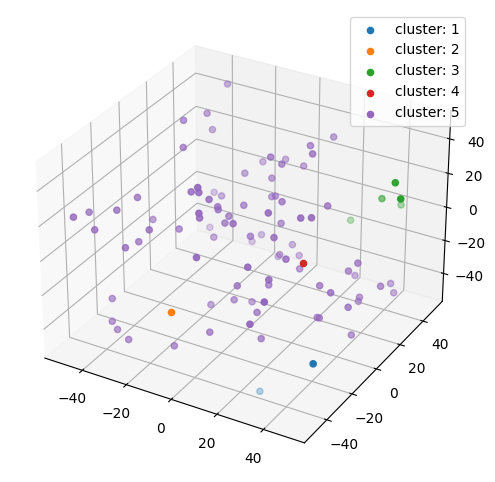

In [10]:
rootNode = ahc(datapoints, singleLinkage)
kClusters = cutTree(rootNode, k=5)
plotGraph(kClusters)

#### Complete Linkage

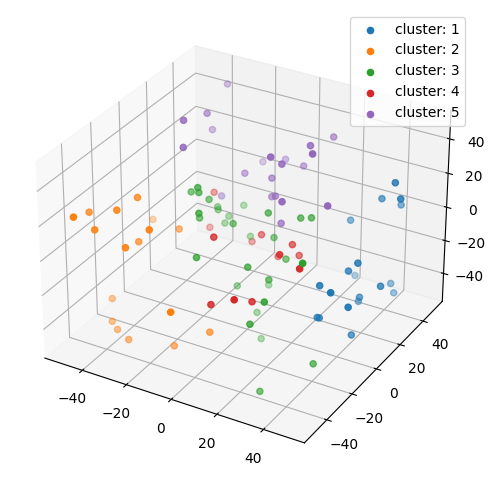

In [11]:
rootNode = ahc(datapoints, completeLinkage)
kClusters = cutTree(rootNode, k=5)
plotGraph(kClusters)

#### Average Linkage

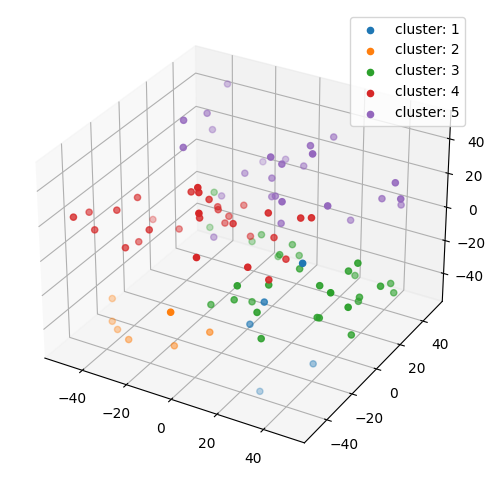

In [12]:
rootNode = ahc(datapoints, averageLinkage)
kClusters = cutTree(rootNode, k=5)
plotGraph(kClusters)

#### Centroid Linkage

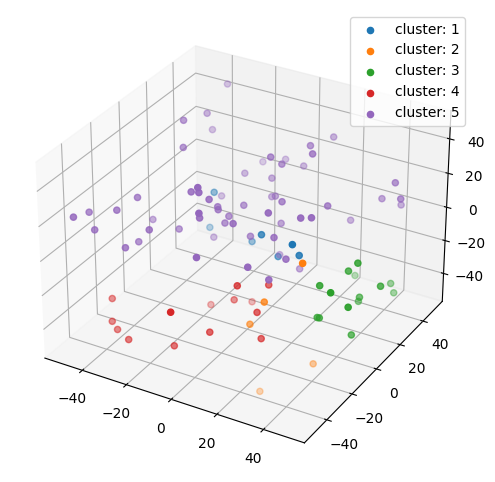

In [13]:
rootNode = ahc(datapoints, centroidLinkage)
kClusters = cutTree(rootNode, k=5)
plotGraph(kClusters)